Note to self, remove a hold out set of data to play around with at the end

In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel('Data/HorseColicData_DeathTarget.xlsx',index=False)
df.shape

(368, 20)

In [2]:
df=df.drop('Unnamed: 0',axis=1)
df

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion,type of lesion,Target,location of lesion
0,2,1,38.5,66,28,3,3,0,2,5,4,4,45.0,1,2,2,1,1,1
1,1,1,39.2,88,20,0,0,4,1,3,4,2,50.0,1,3,2,2,1,2
2,2,1,38.3,40,24,1,1,3,1,3,3,1,33.0,0,1,2,0,0,0
3,1,9,39.1,164,84,4,1,6,2,2,4,4,48.0,0,2,1,2,1,2
4,2,1,37.3,104,35,0,0,6,2,0,0,0,74.0,0,2,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2,1,38.6,60,30,1,1,3,1,4,2,2,40.0,0,1,1,2,0,3
364,2,1,37.8,42,40,1,1,1,1,1,3,1,36.0,0,1,2,1,0,4
365,1,1,38.0,60,12,1,1,2,1,2,1,1,44.0,1,3,1,2,1,2
366,2,1,38.0,42,12,3,0,3,1,1,1,1,37.0,1,1,2,1,0,3


In [3]:
SimpleBinary=df
SimpleBinary['Target'].value_counts()

0    227
1    141
Name: Target, dtype: int64

In [4]:
SimpleBinary.shape

(368, 19)

In [5]:
#Create new df with even split of live die outcomes
A=SimpleBinary[SimpleBinary['Target'] == 0].sample(n=141)
B=SimpleBinary[SimpleBinary['Target'] == 1]

In [6]:
HoldoutSet=SimpleBinary[SimpleBinary['Target'] == 0]

HoldoutSet=HoldoutSet.merge(A, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

HoldoutSet

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion,type of lesion,Target,location of lesion,_merge
0,2,1,38.3,40,24,1,1,3,1,3,3,1,33.0,0,1,2,0,0,0,left_only
1,2,1,38.1,60,28,2,1,3,1,2,3,2,44.0,0,1,2,0,0,0,left_only
9,1,1,37.6,64,21,1,1,2,1,2,3,1,40.0,0,1,1,2,0,4,left_only
14,1,9,38.3,130,60,0,3,0,1,2,4,0,50.0,1,1,1,1,0,3,left_only
21,1,1,37.8,48,12,3,1,1,1,0,3,2,37.0,1,1,2,1,0,4,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2,1,38.3,44,60,0,0,1,1,0,0,0,6.4,1,1,1,0,0,0,left_only
223,2,1,37.4,54,18,3,0,1,1,3,4,3,30.0,0,1,1,1,0,7,left_only
224,1,1,38.1,60,28,4,3,0,2,2,4,1,54.0,1,1,1,4,0,8,left_only
228,2,1,38.6,60,30,1,1,3,1,4,2,2,40.0,0,1,1,2,0,3,left_only


In [7]:
SimpleBinary=A.append(B)

In [8]:
from sklearn.utils import shuffle
SimpleBinary = shuffle(SimpleBinary)

In [9]:
SimpleBinary.isna().sum()

surgery                                                  0
Age                                                      0
rectal temperature                                       0
pulse                                                    0
respiratory rate                                         0
temperature of extremities                               0
peripheral pulse                                         0
mucous membranes                                         0
capillary refill time                                    0
pain  a subjective judgement of the horses pain level    0
peristalsis                                              0
abdominal distension                                     0
packed cell volume                                       0
total protein                                            0
outcome                                                  0
surgical lesion                                          0
type of lesion                                          

In [10]:
SimpleBinary=SimpleBinary.fillna(0) 

In [11]:
X = SimpleBinary.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'temperature of extremities', 'peripheral pulse', 'mucous membranes',
       'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'total protein',
       'surgical lesion', 'type of lesion', 'location of lesion'],
      dtype='object')

In [12]:
y = SimpleBinary.Target ## creating target values
y.value_counts()

1    141
0    141
Name: Target, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .15, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
## Accuracy Scores
score = logreg.score(X_test,Y_test)
print(score)
print(logreg.score(X_train,Y_train))

0.8372093023255814
0.7740585774058577


In [15]:
predictions = logreg.predict(X_test)

In [16]:
predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [17]:
logreg.predict_proba(X_test)

array([[0.78171684, 0.21828316],
       [0.19180304, 0.80819696],
       [0.8355923 , 0.1644077 ],
       [0.72132841, 0.27867159],
       [0.61705192, 0.38294808],
       [0.45439716, 0.54560284],
       [0.24078387, 0.75921613],
       [0.47523267, 0.52476733],
       [0.06440833, 0.93559167],
       [0.50232961, 0.49767039],
       [0.69876669, 0.30123331],
       [0.34082309, 0.65917691],
       [0.15051713, 0.84948287],
       [0.89187254, 0.10812746],
       [0.81600876, 0.18399124],
       [0.76152509, 0.23847491],
       [0.86007617, 0.13992383],
       [0.89887969, 0.10112031],
       [0.16221595, 0.83778405],
       [0.41122586, 0.58877414],
       [0.67567036, 0.32432964],
       [0.23786112, 0.76213888],
       [0.78506941, 0.21493059],
       [0.05625418, 0.94374582],
       [0.1151888 , 0.8848112 ],
       [0.12592825, 0.87407175],
       [0.92652524, 0.07347476],
       [0.74914316, 0.25085684],
       [0.26486297, 0.73513703],
       [0.78065938, 0.21934062],
       [0.

In [18]:
#logreg.coef_(X_test)

In [19]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

<Figure size 900x900 with 2 Axes>

In [21]:
#remove values with correlation less than .1
Corrs=SimpleBinary[SimpleBinary.columns].corr()['outcome']
remove2=Corrs[np.sqrt(Corrs**2) < 0.1].index

In [22]:
remove2

Index(['Age', 'rectal temperature', 'total protein'], dtype='object')

In [23]:
SimpleBinary2=SimpleBinary.drop(list(remove2), axis=1)
SimpleBinary2

,surgery,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,outcome,surgical lesion,type of lesion,Target,location of lesion
311,2,60,24,3,1,3,2,3,3,2,53.0,1,2,1,0,1
131,2,88,36,3,1,1,1,3,3,2,44.0,2,1,4,1,1
83,1,60,24,3,3,6,2,5,0,4,68.0,2,1,2,1,3
330,1,60,10,0,1,1,0,2,3,0,44.0,1,1,1,0,2
223,1,66,12,1,1,3,1,3,3,2,31.5,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2,112,16,0,3,5,2,0,0,1,51.0,3,2,2,1,5
214,2,56,32,2,1,1,1,1,1,1,40.0,1,2,0,0,0
321,1,80,28,3,3,4,2,5,4,3,45.0,1,1,2,0,3
29,2,48,28,2,1,1,1,1,1,1,45.0,1,2,0,0,0


Run it again low corrs gone

In [24]:
X = SimpleBinary2.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['surgery', 'pulse', 'respiratory rate', 'temperature of extremities',
       'peripheral pulse', 'mucous membranes', 'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'surgical lesion',
       'type of lesion', 'location of lesion'],
      dtype='object')

In [25]:
y = SimpleBinary2.Target ## creating target values
y.value_counts()

1    141
0    141
Name: Target, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .25, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
## Accuracy Scores
trainscore = logreg.score(X_train,Y_train)
testscore = logreg.score(X_test,Y_test)

print(trainscore)
print(testscore)

0.7630331753554502
0.8450704225352113


In [28]:
predictions = logreg.predict(X_test)

In [29]:
predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0], dtype=int64)

In [30]:
#logreg.predict_proba(X_test)

In [31]:
#logreg.coef_(X_test)

In [32]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)

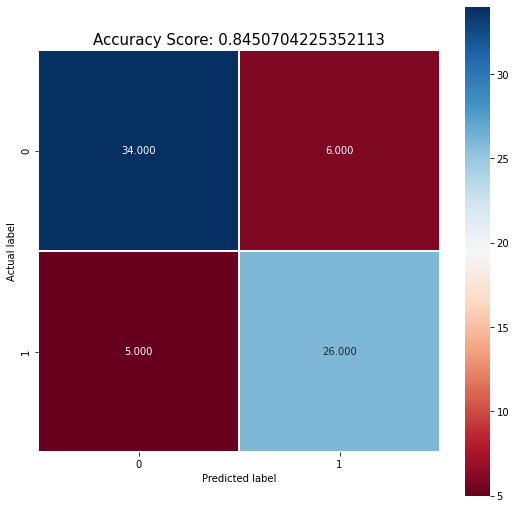

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testscore)
plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

Laaasssoooo

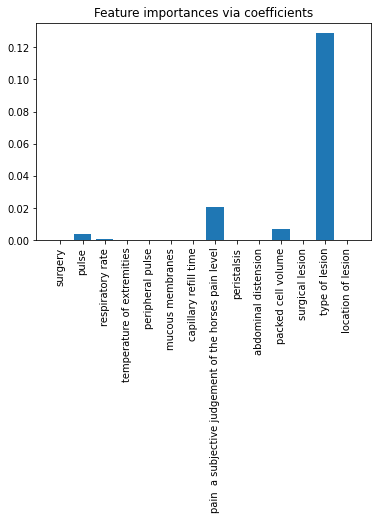

array([0.00000000e+00, 3.51800085e-03, 9.10706997e-04, 0.00000000e+00,
       0.00000000e+00, 5.19194393e-07, 0.00000000e+00, 2.03780476e-02,
       0.00000000e+00, 0.00000000e+00, 6.90519122e-03, 0.00000000e+00,
       1.28921172e-01, 0.00000000e+00])

In [34]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X_train, Y_train)
importance = np.abs(lasso.coef_)
#feature_names = np.array(X_train.values)
plt.bar(height=importance, x=X_train.columns)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()
importance

In [35]:
LassoOutcome = {'feature':X_train.columns,'importance':list(importance)}
LassoOutcome = pd.DataFrame(LassoOutcome)
LassoOutcome

,feature,importance
0,surgery,0.000000e+00
1,pulse,3.518001e-03
2,respiratory rate,9.107070e-04
3,temperature of extremities,0.000000e+00
4,peripheral pulse,0.000000e+00
5,mucous membranes,5.191944e-07
6,capillary refill time,0.000000e+00
7,pain a subjective judgement of the horses pai...,2.037805e-02
8,peristalsis,0.000000e+00
9,abdominal distension,0.000000e+00


In [36]:
#remove values with importance of 0
Lassoremove=LassoOutcome[LassoOutcome['importance'] == 0]
list(Lassoremove['feature'])

['surgery',
 'temperature of extremities',
 'peripheral pulse',
 'capillary refill time',
 'peristalsis',
 'abdominal distension',
 'surgical lesion',
 'location of lesion']

In [37]:
SimpleBinary3=SimpleBinary.drop(list(Lassoremove['feature']), axis=1)
SimpleBinary3

,Age,rectal temperature,pulse,respiratory rate,mucous membranes,pain a subjective judgement of the horses pain level,packed cell volume,total protein,outcome,type of lesion,Target
311,1,38.2,60,24,3,3,53.0,0,1,1,0
131,1,37.6,88,36,1,3,44.0,0,2,4,1
83,1,38.0,60,24,6,5,68.0,1,2,2,1
330,1,39.1,60,10,1,2,44.0,0,1,1,0
223,1,37.7,66,12,3,3,31.5,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
36,1,38.3,112,16,5,0,51.0,0,3,2,1
214,1,38.6,56,32,1,1,40.0,0,1,0,0
321,1,38.3,80,28,4,5,45.0,0,1,2,0
29,1,37.7,48,28,1,1,45.0,1,1,0,0


Now lets retrain the classifier model using these features.

In [38]:
X = SimpleBinary3.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'mucous membranes',
       'pain  a subjective judgement of the horses pain level',
       'packed cell volume', 'total protein', 'type of lesion'],
      dtype='object')

In [39]:
y = SimpleBinary3.Target ## creating target values
y.value_counts()

1    141
0    141
Name: Target, dtype: int64

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .25, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
## Accuracy Scores
trainscore = logreg.score(X_train,Y_train)
testscore = logreg.score(X_test,Y_test)

print(trainscore)
print(testscore)

0.7630331753554502
0.8450704225352113


In [42]:
predictions = logreg.predict(X_test)

In [43]:
cm = metrics.confusion_matrix(Y_test, predictions)

We now observe a test accuracy equal to that of the baseline with the removal of the above variables identified by the lasso regression. While no improvement was noted, excluding uneeded features makes for a better model and we will now use this dataset moving forward for parameter testing and final evaluation.

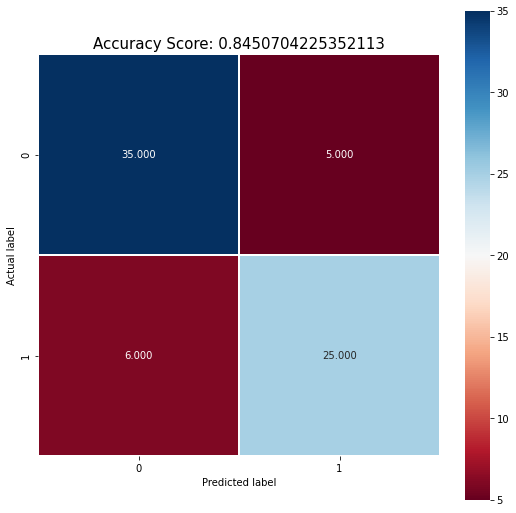

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testscore)
plt.title(all_sample_title, size = 15);
#plt.savefig('ConfusionMatrix_Lasso.png')
plt.show()

## Rerun model here once unimportant features have been excluded, get train test splt accuracy

In [45]:
len(SimpleBinary)

282

Validating the model via Cross Validation, k folds used as dataset isnt huge orig run time * k times
https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(len(SimpleBinary2)))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# 10-fold cross-validation 
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)

[0.75862069 0.72413793 0.67857143 0.82142857 0.67857143 0.53571429
 0.78571429 0.85714286 0.75       0.89285714]


In [49]:
print(scores.mean())

0.7482758620689656


In [50]:
Cvals=[0.001,0.01,0.1,1,10,100]
k_scores = []
for c in Cvals:
    logreg = LogisticRegression(max_iter= 10000,random_state = 40,C=c) ## instantiate

    scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.712807881773399, 0.7514778325123153, 0.7518472906403941, 0.7448275862068965, 0.744704433497537, 0.7482758620689656]


In [51]:
solve = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
k_scores = []
for s in solve:
    logreg = LogisticRegression(max_iter= 1000000,random_state = 40,solver=s,C=.01) ## instantiate

    scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7514778325123153, 0.7514778325123153, 0.7479064039408867, 0.7479064039408867, 0.7479064039408867]


In [52]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
logreg = LogisticRegression(max_iter= 1000000,random_state = 40,C=.01,solver='lbfgs') ## instantiate
logreg.fit(X_train, Y_train) ## fit
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.7514778325123153


In [53]:
Y_test.value_counts()


0    40
1    31
Name: Target, dtype: int64

In [54]:
#Checking null accuracy
Y_test.value_counts().head(1) / len(Y_test)


0    0.56338
Name: Target, dtype: float64

In [55]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [56]:
print('True:', Y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0]
Pred: [0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1]


In [57]:
#Checking Distribution

In [58]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.38644427, 0.874088  , 0.37390369, 0.27626456, 0.46548249,
       0.58037577, 0.70847065, 0.67195399, 0.90115567, 0.40894317,
       0.37084667, 0.44844425, 0.76339352, 0.27047387, 0.28736948,
       0.37309423, 0.29615406, 0.22284683, 0.8456147 , 0.36539614,
       0.38663414, 0.55220882, 0.3654334 , 0.64220708, 0.55821815,
       0.79291672, 0.29614779, 0.28518997, 0.76823722, 0.44016638,
       0.54423433, 0.80220864, 0.45091167, 0.87519979, 0.34930221,
       0.81921786, 0.23241388, 0.39871491, 0.2323217 , 0.9198722 ,
       0.56773063, 0.20035727, 0.18049507, 0.50812997, 0.83415841,
       0.31721703, 0.27865403, 0.38801324, 0.20482201, 0.36051103,
       0.25531079, 0.2027629 , 0.78256509, 0.28102774, 0.26206999,
       0.64523938, 0.85522818, 0.22001691, 0.47907309, 0.74030967,
       0.53702509, 0.18415787, 0.05365122, 0.77425578, 0.46061566,
       0.61270634, 0.23188665, 0.65917835, 0.52571367, 0.69053043,
       0.33804752])

Text(0, 0.5, 'Frequency')

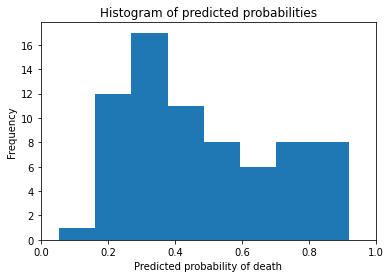

In [59]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of death')
plt.ylabel('Frequency')

In [60]:
# predict death if the predicted probability is greater than 0.45, err on the side of caution, also more wrong false negs
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.5)[0]

In [61]:
print(metrics.confusion_matrix(Y_test, y_pred_class))


[[34  6]
 [ 7 24]]


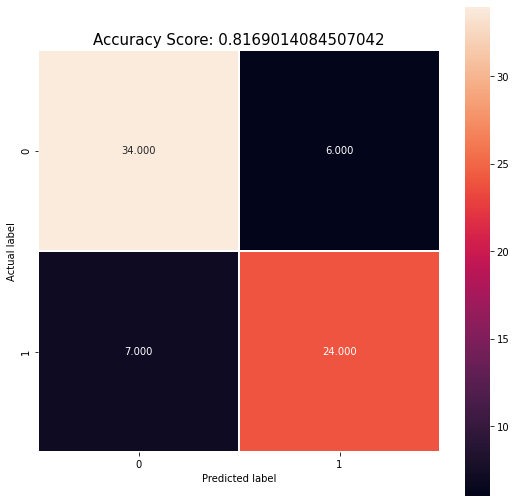

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap((metrics.confusion_matrix(Y_test, y_pred_class)), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(Y_test, y_pred_class)))
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

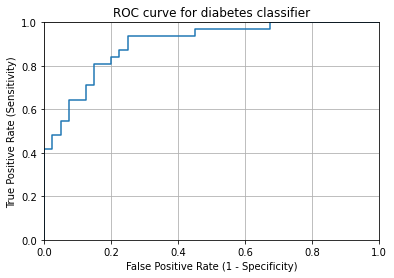

In [63]:
#Using the ROC curve to optimize, balancing specificity and sensitivity
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [64]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(0.45)


Sensitivity: 0.8387096774193549
Specificity: 0.8


In [65]:
#Checking area under curve as alternative to classification accuracy 
print(metrics.roc_auc_score(Y_test, y_pred_prob))

0.8991935483870968


In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8152721088435374

Final model check using holdout data.

In [67]:
HoldoutSet=HoldoutSet.drop('_merge', axis=1)

In [68]:
#HoldoutSet=HoldoutSet.drop(list(remove2), axis=1)
HoldoutSet=HoldoutSet.drop(list(Lassoremove['feature']), axis=1)


In [69]:
X = HoldoutSet.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'mucous membranes',
       'pain  a subjective judgement of the horses pain level',
       'packed cell volume', 'total protein', 'type of lesion'],
      dtype='object')

In [70]:
y = HoldoutSet.Target ## creating target values
y.value_counts()

0    86
Name: Target, dtype: int64

In [71]:
#scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
#print(scores.mean())
## Accuracy Scores
trainscore = logreg.score(X,y)
#testscore = logreg.score(X_test,Y_test)

print(trainscore)
#print(testscore)

0.7674418604651163


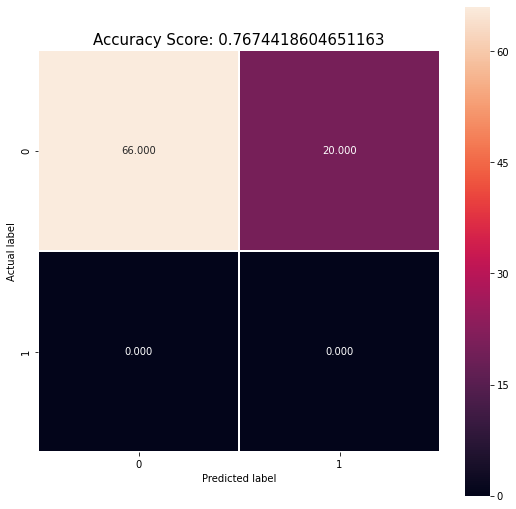

In [72]:
metrics.confusion_matrix(y, logreg.predict(X))


plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y, logreg.predict(X)), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format((trainscore))
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()